<a href="https://colab.research.google.com/github/brunom764/A-Bendita-Italia/blob/main/Machine_Learning_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python de A à Z IA Expert Academy - Regressão

# Regressão linear simples

## Base plano saúde

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [ ]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [ ]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [ ]:
X_plano_saude.shape

(10,)

In [ ]:
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [ ]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

In [ ]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

In [ ]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [ ]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [ ]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

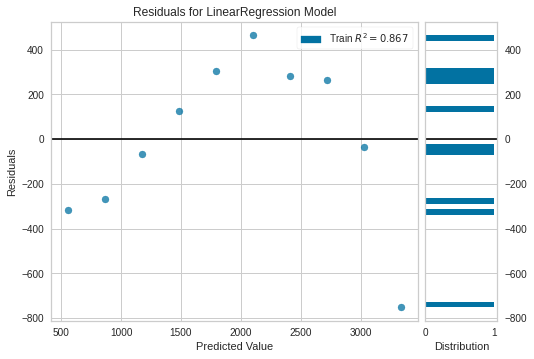

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

## Base preço das casas - MAE 172.604, 0.48

In [ ]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


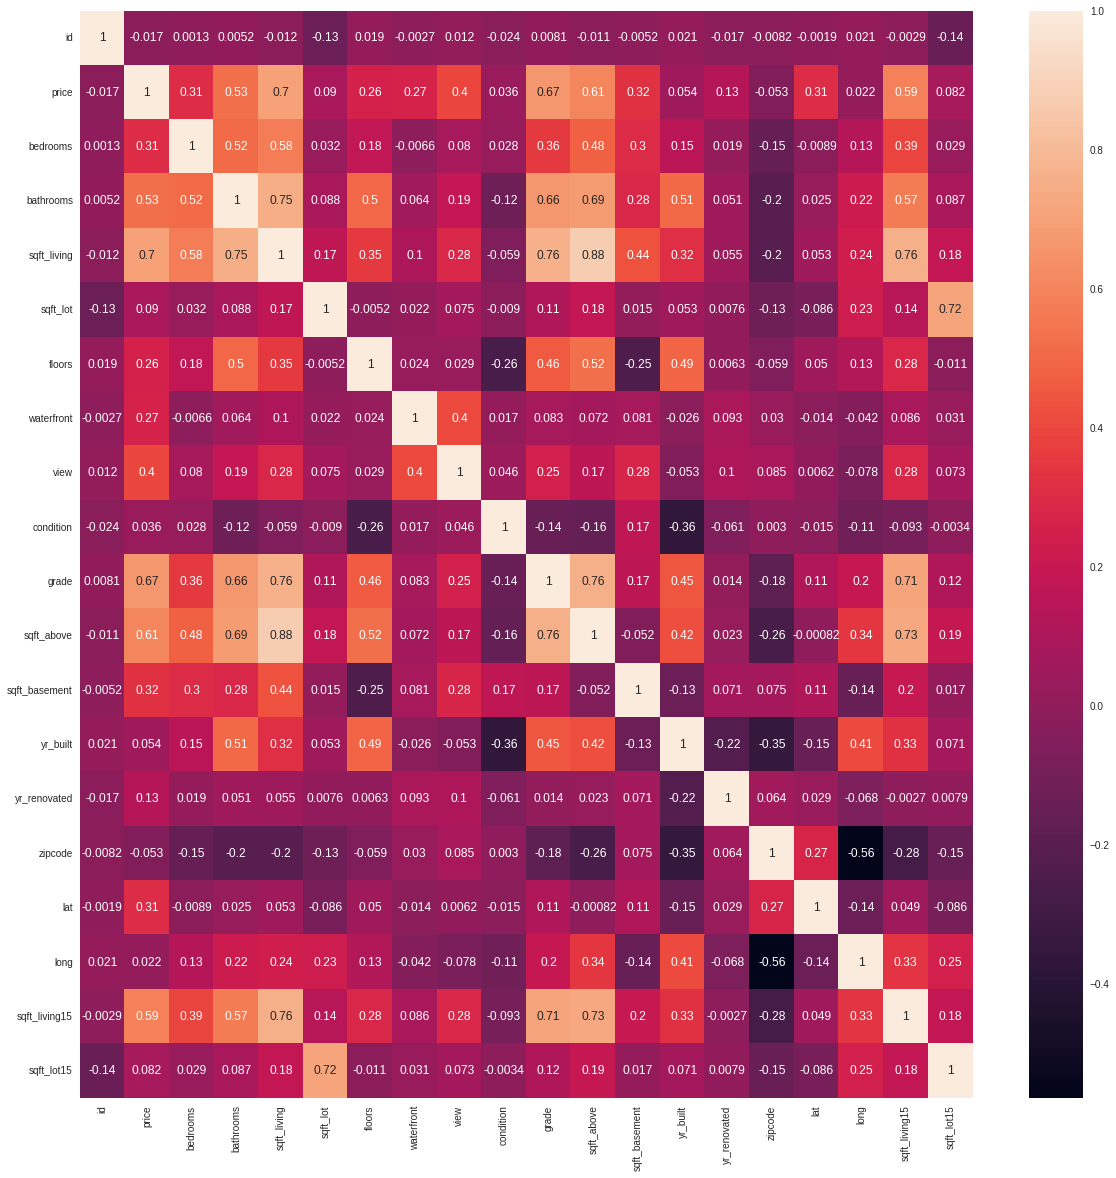

In [ ]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True);

In [ ]:
X_casas = base_casas.iloc[:,5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [ ]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [ ]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [ ]:
# b0
regressor_simples_casas.intercept_

-37893.59850106726

In [ ]:
# b1
regressor_simples_casas.coef_

array([278.32860644])

In [ ]:
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [ ]:
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453027

In [ ]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [ ]:
grafico = px.scatter(x = X_casas_treinamento.ravel(), y = previsoes)
grafico.show()

In [ ]:
grafico1 = px.scatter(x = X_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line(x = X_casas_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [ ]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
abs(y_casas_teste - previsoes_teste).mean()

172604.1288999542

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_casas_teste, previsoes_teste)

172604.1288999542

In [ ]:
mean_squared_error(y_casas_teste, previsoes_teste)

70170013932.1159

In [ ]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

264896.23238565685

In [ ]:
grafico1 = px.scatter(x = X_casas_teste.ravel(), y = y_casas_teste)
grafico2 = px.line(x = X_casas_teste.ravel(), y = previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

# Regressão linear múltipla

## Base preço das casas - MAE 123.888, 0.68

In [ ]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [ ]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [ ]:
X_casas_treinamento.shape, X_casas_teste.shape

((15129, 16), (6484, 16))

In [ ]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [ ]:
regressor_multiplo_casas.intercept_

5736222.703394298

In [ ]:
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [ ]:
len(regressor_multiplo_casas.coef_)

16

In [ ]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [ ]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6885414149062676

In [ ]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 383751.77768699, 1514216.17517446,  546921.96179113, ...,
        314968.57623303,  219405.55573556,  148128.83467043])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

123888.4437748578

# Regressão polinomial

## Base plano de saúde

In [ ]:
base_plano_saude2 = pd.read_csv('plano_saude2.csv')
base_plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [ ]:
X_plano_saude2 = base_plano_saude2.iloc[:, 0:1].values
y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

In [ ]:
X_plano_saude2_poly.shape

(10, 5)

In [ ]:
18 * 18, 18 * 18 * 18, 18 * 18 * 18 * 18

(324, 5832, 104976)

In [ ]:
X_plano_saude2_poly[0]

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

In [ ]:
23 * 23

529

In [ ]:
X_plano_saude2_poly[1]

array([1.00000e+00, 2.30000e+01, 5.29000e+02, 1.21670e+04, 2.79841e+05])

In [ ]:
X_plano_saude2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [ ]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude2_poly, y_plano_saude2)

LinearRegression()

In [ ]:
# b0
regressor_saude_polinomial.intercept_

16561.97463791193

In [ ]:
# b1 (n)
regressor_saude_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [ ]:
novo = [[40]]

In [ ]:
novo = poly.transform(novo)
novo

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

In [ ]:
regressor_saude_polinomial.predict(novo)

array([1335.33958015])

In [ ]:
previsoes = regressor_saude_polinomial.predict(X_plano_saude2_poly)
previsoes

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

In [ ]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

## Base preço das casas - MAE 101.225, 0.81

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_casas_treinamento_poly = poly.fit_transform(X_casas_treinamento)
X_casas_teste_poly = poly.transform(X_casas_teste)

In [ ]:
X_casas_treinamento_poly.shape, X_casas_teste_poly.shape

((15129, 153), (6484, 153))

In [ ]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(X_casas_treinamento_poly, y_casas_treinamento)

LinearRegression()

In [ ]:
regressor_casas_poly.score(X_casas_treinamento_poly, y_casas_treinamento)

0.8179291296855723

In [ ]:
regressor_casas_poly.score(X_casas_teste_poly, y_casas_teste)

0.8153028400650266

In [ ]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 385879.30371094, 1990804.75125122,  578376.72340393, ...,
        433301.44465637,  233954.5686264 ,  123613.70202637])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
mean_absolute_error(y_casas_teste, previsoes)

101233.04073967483

# Árvores de decisão

## Base plano saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude2, y_plano_saude2)

DecisionTreeRegressor()

In [ ]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [ ]:
regressor_arvore_saude.score(X_plano_saude2, y_plano_saude2)

1.0

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [ ]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1)
X_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [ ]:
X_teste_arvore.shape

(450,)

In [ ]:
X_teste_arvore = X_teste_arvore.reshape(-1,1)
X_teste_arvore.shape

(450, 1)

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

In [ ]:
regressor_arvore_saude.predict([[40.6]])

array([1530.])

## Base preço das casas - MAE 99.917, 0.73

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [ ]:
regressor_arvore_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [ ]:
regressor_arvore_casas.score(X_casas_teste, y_casas_teste)

0.7043387625954829

In [ ]:
previsoes = regressor_arvore_casas.predict(X_casas_teste)
previsoes

array([ 288000., 2340000.,  480000., ...,  289000.,  215000.,  205000.])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

99924.67635718692

# Random forest

## Base plano de saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_saude = RandomForestRegressor(n_estimators = 10)
regressor_random_forest_saude.fit(X_plano_saude2, y_plano_saude2)

RandomForestRegressor(n_estimators=10)

In [ ]:
regressor_random_forest_saude.score(X_plano_saude2, y_plano_saude2)

0.9636212604967844

In [ ]:
X_teste_arvore

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_random_forest_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

In [ ]:
regressor_random_forest_saude.predict([[40]])

array([1162.])

## Base preço das casas - MAE 67.615, 0.88

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste

array([[ 2.00000e+00,  1.50000e+00,  1.43000e+03, ...,  9.81250e+04,
         4.77222e+01, -1.22290e+02],
       [ 4.00000e+00,  3.25000e+00,  4.67000e+03, ...,  9.80050e+04,
         4.76350e+01, -1.22164e+02],
       [ 2.00000e+00,  7.50000e-01,  1.44000e+03, ...,  9.81070e+04,
         4.76707e+01, -1.22364e+02],
       ...,
       [ 3.00000e+00,  2.50000e+00,  2.15000e+03, ...,  9.80580e+04,
         4.74514e+01, -1.22089e+02],
       [ 3.00000e+00,  1.75000e+00,  1.48000e+03, ...,  9.80320e+04,
         4.73657e+01, -1.22280e+02],
       [ 3.00000e+00,  1.00000e+00,  1.32000e+03, ...,  9.80920e+04,
         4.73120e+01, -1.22183e+02]])

In [ ]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_casas.fit(X_casas_treinamento, y_casas_treinamento)

RandomForestRegressor()

In [ ]:
regressor_random_forest_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9805690570189144

In [ ]:
regressor_random_forest_casas.score(X_casas_teste, y_casas_teste)

0.8808150923594946

In [ ]:
previsoes = regressor_random_forest_casas.predict(X_casas_teste)
previsoes

array([ 302646.08 , 1715958.9  ,  533418.   , ...,  367195.88 ,
        233929.23 ,  201909.066])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

68088.07038927078

# SVM

## Base plano de saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
# Kernel linear
from sklearn.svm import SVR
regressor_svr_saude_linear = SVR(kernel = 'linear')
regressor_svr_saude_linear.fit(X_plano_saude2, y_plano_saude2)

SVR(kernel='linear')

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_linear.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [ ]:
# Kernel polinomial
regressor_svr_saude_poly = SVR(kernel='poly', degree=4)
regressor_svr_saude_poly.fit(X_plano_saude2, y_plano_saude2)

SVR(degree=4, kernel='poly')

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_plano_saude2_scaled = scaler_x.fit_transform(X_plano_saude2)
scaler_y = StandardScaler()
y_plano_saude2_scaled = scaler_y.fit_transform(y_plano_saude2.reshape(-1,1))

In [ ]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [ ]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

SVR()

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled.ravel(), y = regressor_svr_saude_rbf.predict(X_plano_saude2_scaled), name = 'Regressão')
grafico.show()

In [ ]:
novo = [[40]]

In [ ]:
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [ ]:
#scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo)) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)

In [ ]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo).reshape(-1, 1))

array([[1333.85650748]])

## Base preço das casas - MAE 82.453, 0.73

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x_casas = StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_casas_treinamento)
scaler_y_casas = StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_casas_treinamento.reshape(-1,1))

In [ ]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [ ]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [ ]:
X_casas_treinamento_scaled.shape, y_casas_treinamento_scaled.shape

((15129, 16), (15129, 1))

In [ ]:
X_casas_teste_scaled = scaler_x_casas.transform(X_casas_teste)
y_casas_teste_scaled = scaler_y_casas.transform(y_casas_teste.reshape(-1,1))

In [ ]:
X_casas_teste_scaled.shape, y_casas_teste_scaled.shape

((6484, 16), (6484, 1))

In [ ]:
X_casas_teste_scaled

array([[-1.44563583, -0.79711466, -0.70193254, ...,  0.88741047,
         1.17204161, -0.53947092],
       [ 0.67170039,  1.47093569,  2.80513482, ..., -1.36052304,
         0.54321655,  0.35604518],
       [-1.44563583, -1.76913625, -0.69110826, ...,  0.55022044,
         0.80065984, -1.06540895],
       ...,
       [-0.38696772,  0.49891411,  0.07741576, ..., -0.36768574,
        -0.78077751,  0.88909048],
       [-0.38696772, -0.47310747, -0.64781113, ..., -0.854738  ,
        -1.39878563, -0.46839822],
       [-0.38696772, -1.44512905, -0.82099964, ...,  0.26922876,
        -1.78603226,  0.22100704]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

SVR()

In [ ]:
regressor_svr_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8123337393146999

In [ ]:
regressor_svr_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.7374454724624955

In [ ]:
#previsoes = regressor_svr_casas.predict(X_casas_teste_scaled) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)
#previsoes

In [ ]:
previsoes = regressor_svr_casas.predict(X_casas_teste_scaled).reshape(-1, 1)
previsoes

array([[-0.54571552],
       [ 3.46454238],
       [ 0.02286424],
       ...,
       [-0.46405796],
       [-0.91113329],
       [-1.03334346]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes)

In [ ]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [ ]:
previsoes_inverse

array([[ 341068.00437506],
       [1807402.87779178],
       [ 548966.93331462],
       ...,
       [ 370925.76457821],
       [ 207454.44649635],
       [ 162768.78477289]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

82453.0219893096

# Redes neurais artificiais

## Base plano de saúde

In [ ]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [ ]:
regressor_rna_saude.score(X_plano_saude2_scaled, y_plano_saude2_scaled)

0.9492787786035837

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled.ravel(), y = regressor_rna_saude.predict(X_plano_saude2_scaled), name = 'Regressão')
grafico.show()

In [ ]:
novo = [[40]]
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [ ]:
##scaler_y.inverse_transform(regressor_rna_saude.predict(novo)) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)

In [ ]:
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(-1, 1))

array([[1035.53068313]])

## Base preço das casas - MAE 76.311, 0.87

In [ ]:
X_casas_treinamento_scaled.shape

(15129, 16)

In [ ]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [ ]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [ ]:
X_casas_teste_scaled.shape

(6484, 16)

In [ ]:
(16 + 1) / 2

8.5

In [ ]:
# 16 -> 9 -> 9 -> 1
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [ ]:
regressor_rna_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8957851760541201

In [ ]:
regressor_rna_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.8829032673414091

In [ ]:
##previsoes = regressor_rna_casas.predict(X_casas_teste_scaled) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)
##previsoes

In [ ]:
previsoes = regressor_rna_casas.predict(X_casas_teste_scaled).reshape(-1, 1)
previsoes

array([[-0.62257673],
       [ 3.15823802],
       [ 0.0060229 ],
       ...,
       [-0.6398629 ],
       [-0.86445047],
       [-0.87403925]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes)

In [ ]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [ ]:
previsoes_inverse

array([[ 312964.00820757],
       [1695403.9062343 ],
       [ 542808.96556917],
       ...,
       [ 306643.38759994],
       [ 224523.8342576 ],
       [ 221017.73606687]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

74774.25630637241